# Audio Classification Model
Download this dataset (Link) Train an audio classification model by using PyTorch or TensorFlow Show the confusion metric and classification report Convert/transform this model into a lightweight model. It is not needed to retrain the model, just need to convert the model into lightweight frameworks like ONNX Compare the inference time of the normal model and the lightweight model

In [24]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np


In [25]:
# Paths
data_dir = '/kaggle/input/audio-cats-and-dogs/cats_dogs'
train_dir = os.path.join(data_dir, '/kaggle/input/audio-cats-and-dogs/cats_dogs/train')
test_dir = os.path.join(data_dir, '/kaggle/input/audio-cats-and-dogs/cats_dogs/test')

# Count samples
train_cat = len(os.listdir(os.path.join(train_dir, 'cat')))
train_dog = len(os.listdir(os.path.join(train_dir, 'dog')))
test_cat = len(os.listdir(os.path.join(test_dir, 'cats')))
test_dog = len(os.listdir(os.path.join(test_dir, 'test')))


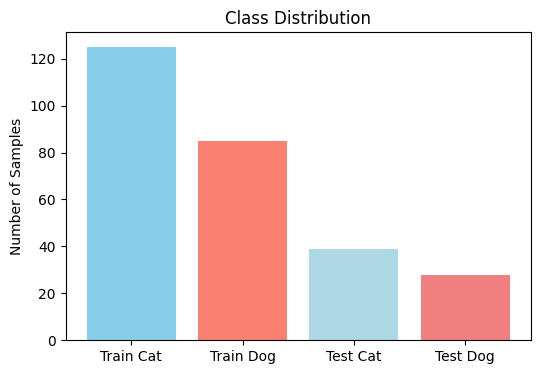

In [26]:
# Bar plot - Class distribution
plt.figure(figsize=(6,4))
plt.bar(['Train Cat', 'Train Dog', 'Test Cat', 'Test Dog'],
        [train_cat, train_dog, test_cat, test_dog],
        color=['skyblue', 'salmon', 'lightblue', 'lightcoral'])
plt.title('Class Distribution')
plt.ylabel('Number of Samples')
plt.show()

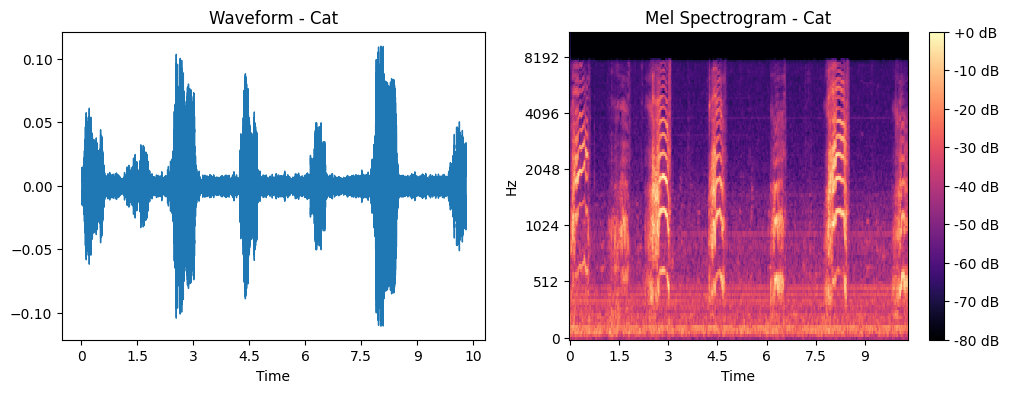

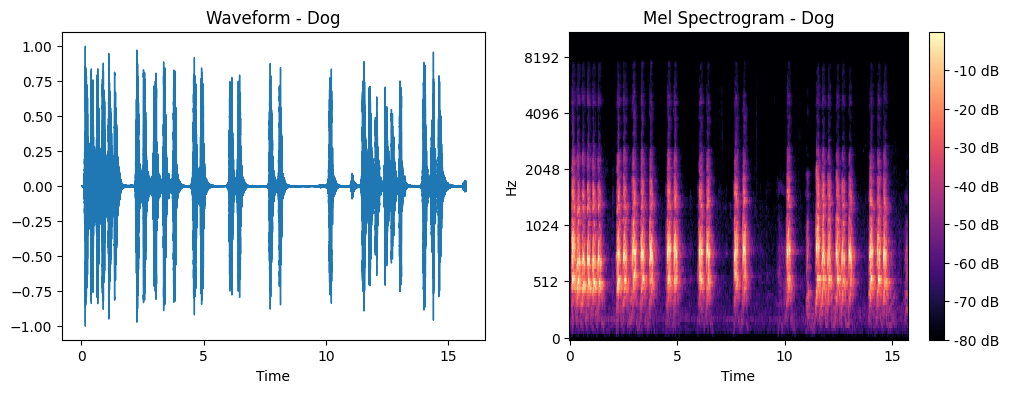

In [27]:
def visualize_audio(file_path, label):
    y, sr = librosa.load(file_path)
    plt.figure(figsize=(12, 4))

    # Waveform
    plt.subplot(1, 2, 1)
    librosa.display.waveshow(y, sr=sr)
    plt.title(f'Waveform - {label}')

    # Spectrogram
    plt.subplot(1, 2, 2)
    spec = librosa.feature.melspectrogram(y=y, sr=sr)
    log_spec = librosa.power_to_db(spec, ref=np.max)
    librosa.display.specshow(log_spec, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Mel Spectrogram - {label}')
    plt.show()

# Example
cat_sample = os.path.join(train_dir, 'cat', 'cat_22.wav')
dog_sample = os.path.join(train_dir, 'dog', 'dog_barking_97.wav')

visualize_audio(cat_sample, 'Cat')
visualize_audio(dog_sample, 'Dog')


In [4]:
!pip install onnxruntime librosa

In [1]:
pip install torch torchaudio pandas numpy scikit-learn seaborn matplotlib onnx onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 84.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 72.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 83.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━

In [30]:
import os
import librosa
import pandas as pd
import numpy as np
from scipy import stats

In [31]:
# Directories
train_cat_dir = '/kaggle/input/audio-cats-and-dogs/cats_dogs/train/cat'
train_dog_dir = '/kaggle/input/audio-cats-and-dogs/cats_dogs/train/dog'
test_dir = '/kaggle/input/audio-cats-and-dogs/cats_dogs/test'

# Helper function to calculate durations
def get_durations_from_folder(folder_path, label=None):
    durations = []
    labels = []
    for fname in os.listdir(folder_path):
        if fname.endswith('.wav'):
            file_path = os.path.join(folder_path, fname)
            y, sr = librosa.load(file_path, sr=None)
            durations.append(len(y) / sr)
            if label:
                labels.append(label)
    return durations, labels

# Collect durations
cat_durations, cat_labels = get_durations_from_folder(train_cat_dir, 'cat')
dog_durations, dog_labels = get_durations_from_folder(train_dog_dir, 'dog')
test_durations, _ = get_durations_from_folder(test_dir)

# Combine train data
train_durations = cat_durations + dog_durations
train_labels = cat_labels + dog_labels

# Create DataFrames
train_df = pd.DataFrame({'label': train_labels, 'duration': train_durations})
test_df = pd.DataFrame({'duration': test_durations})

In [35]:
# ----------------------------
# 📊 Compute Statistics
# ----------------------------

print("📌 Overall Train Audio Stats:")
print(f"- Mean Duration:   {np.mean(train_durations):.2f} sec")
print(f"- Median Duration: {np.median(train_durations):.2f} sec")
print(f"- Std Dev:         {np.std(train_durations):.2f} sec")
print(f"- Mode Label:      {pd.Series(train_labels).mode()[0]}")

print("\n📌 Per-Class Stats (Train):")
print(train_df.groupby("label")["duration"].agg(["count", "mean", "median", "std"]))

📌 Overall Train Audio Stats:
- Mean Duration:   7.20 sec
- Median Duration: 6.71 sec
- Std Dev:         4.54 sec
- Mode Label:      cat

📌 Per-Class Stats (Train):
       count      mean     median       std
label                                      
cat      125  8.323921  10.800000  4.569179
dog       85  5.550088   3.882563  3.999876


In [2]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [3]:
%%writefile /kaggle/working/utils.py
import numpy as np
import pandas as pd
import scipy.io.wavfile as sci_wav
import random

ROOT_DIR = '/kaggle/input/audio-cats-and-dogs/cats_dogs/'
CSV_PATH = '/kaggle/input/audio-cats-and-dogs/train_test_split.csv'

def read_wav_files(wav_files):
    '''Returns a list of audio waves
    Params:
        wav_files: List of .wav paths
    Returns:
        List of audio signals
    '''
    if not isinstance(wav_files, list):
        wav_files = [wav_files]
    return [sci_wav.read(ROOT_DIR + f)[1] for f in wav_files]

def get_trunk(_X, idx, sample_len, rand_offset=False):
    '''Returns a trunk of the 1D array <_X>
    Params:
        _X: the concatenated audio samples
        idx: _X will be split in <sample_len> items. _X[idx]
        rand_offset: boolean to say whether or not we use an offset
    '''
    randint = np.random.randint(10000) if rand_offset else 0
    start_idx = (idx * sample_len + randint) % len(_X)
    end_idx = ((idx + 1) * sample_len + randint) % len(_X)
    if end_idx > start_idx:
        return _X[start_idx:end_idx]
    else:
        return np.concatenate((_X[start_idx:], _X[:end_idx]))

def get_augmented_trunk(_X, idx, sample_len, added_samples=0):
    X = get_trunk(_X, idx, sample_len)
    for _ in range(added_samples):
        ridx = np.random.randint(len(_X))
        X = X + get_trunk(_X, ridx, sample_len)
    return X

def dataset_gen(dataset, is_train=True, batch_shape=(20, 16000), sample_augmentation=0):
    '''This generator returns training batches of size <batch_shape>
    Params:
        dataset: Dictionary containing train_cat, train_dog, test_cat, test_dog
        is_train: True for training generator, False for test
        batch_shape: Tuple of (num_samples_per_batch, num_datapoints_per_sample)
        sample_augmentation: Number of additional audio samples to augment (train only)
    '''
    s_per_batch = batch_shape[0]
    s_len = batch_shape[1]
    X_cat = dataset['train_cat'] if is_train else dataset['test_cat']
    X_dog = dataset['train_dog'] if is_train else dataset['test_dog']
    nbatch = int(max(len(X_cat), len(X_dog)) / s_len)
    perms = [list(enumerate([i] * nbatch)) for i in range(2)]
    perms = sum(perms, [])
    random.shuffle(perms)
    y_batch = np.zeros(s_per_batch)
    X_batch = np.zeros(batch_shape)
    while len(perms) > s_per_batch:
        for bidx in range(s_per_batch):
            perm, _y = perms.pop()
            y_batch[bidx] = _y
            _X = X_cat if _y == 0 else X_dog
            if is_train:
                X_batch[bidx] = get_augmented_trunk(
                    _X, idx=perm, sample_len=s_len, added_samples=sample_augmentation)
            else:
                X_batch[bidx] = get_trunk(_X, perm, s_len)
        yield (X_batch.reshape(s_per_batch, s_len, 1),
               y_batch.reshape(-1, 1))

def load_dataset(dataframe):
    '''Load the dataset into a dictionary
    Params:
        dataframe: Pandas DataFrame with columns [train_cat, train_dog, test_cat, test_dog]
    Returns:
        dataset: Dictionary with keys train_cat, train_dog, test_cat, test_dog
    '''
    df = dataframe
    dataset = {}
    for k in ['train_cat', 'train_dog', 'test_cat', 'test_dog']:
        v = list(df[k].dropna())
        v = read_wav_files(v)
        v = np.concatenate(v).astype('float32')
        if k == 'train_cat':
            dog_std = dog_mean = 0
            cat_std, cat_mean = v.std(), v.mean()
        elif k == 'train_dog':
            dog_std, dog_mean = v.std(), v.mean()
        std, mean = (cat_std, cat_mean) if 'cat' in k else (dog_std, dog_mean)
        v = (v - mean) / std
        dataset[k] = v
        print(f'loaded {k} with {len(v) / 16000:.2f} sec of audio')
    return dataset

Writing /kaggle/working/utils.py


In [5]:
import os
if os.path.exists('/kaggle/working/utils.py'):
    print("utils.py exists, keeping it as is")
else:
    print("No existing utils.py found")
print("Files in current directory:", os.listdir())

utils.py exists, keeping it as is
Files in current directory: ['utils.py', '.virtual_documents']


In [6]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import confusion_matrix, classification_report
import onnx
import onnxruntime as ort
import time
import scipy.io.wavfile as sci_wav
import os

In [7]:
# Verify imports
print("Verifying imports")
try:
    from utils import dataset_gen, load_dataset
except ImportError as e:
    print(f"Error importing utils: {e}")
    print("Please ensure utils.py is in /kaggle/working/")
    exit(1)

# Define paths
ROOT_DIR = '/kaggle/input/audio-cats-and-dogs/cats_dogs/'
CSV_PATH = '/kaggle/input/audio-cats-and-dogs/train_test_split.csv'

# Verify paths
print("Verifying environment")
print("Current working directory:", os.getcwd())
print("Files in current directory:", os.listdir())
try:
    print("Dataset directory contents:", os.listdir('/kaggle/input/audio-cats-and-dogs/cats_dogs/'))
except FileNotFoundError:
    print("Error: Dataset directory not found")
    exit(1)
print("CSV file exists:", os.path.exists(CSV_PATH))
print("utils.py exists:", os.path.exists('/kaggle/working/utils.py'))

# Load dataset
print("\nLoading dataset")
try:
    df = pd.read_csv(CSV_PATH)
    dataset = load_dataset(df)
    print("Dataset keys:", list(dataset.keys()))
except Exception as e:
    print(f"Error loading dataset: {e}")
    exit(1)

Verifying imports
Verifying environment
Current working directory: /kaggle/working
Files in current directory: ['__pycache__', 'utils.py', '.virtual_documents']
Dataset directory contents: ['dog_barking_102.wav', 'cat_43.wav', 'dog_barking_29.wav', 'cat_47.wav', 'dog_barking_50.wav', 'dog_barking_83.wav', 'cat_83.wav', 'cat_84.wav', 'cat_129.wav', 'cat_74.wav', 'cat_124.wav', 'dog_barking_30.wav', 'cat_89.wav', 'cat_52.wav', 'dog_barking_98.wav', 'cat_21.wav', 'cat_103.wav', 'cat_153.wav', 'cat_165.wav', 'cat_70.wav', 'dog_barking_33.wav', 'dog_barking_32.wav', 'cat_100.wav', 'dog_barking_2.wav', 'dog_barking_17.wav', 'cat_13.wav', 'cat_63.wav', 'cat_11.wav', 'cat_109.wav', 'dog_barking_6.wav', 'dog_barking_88.wav', 'cat_130.wav', 'cat_136.wav', 'cat_150.wav', 'dog_barking_101.wav', 'cat_139.wav', 'dog_barking_15.wav', 'cat_69.wav', 'dog_barking_94.wav', 'cat_72.wav', 'cat_156.wav', 'dog_barking_13.wav', 'cat_28.wav', 'cat_120.wav', 'dog_barking_60.wav', 'cat_19.wav', 'cat_128.wav', 'd

In [9]:
# Define the CNN model
print("\nDefining the CNN model")
class AudioCNN(nn.Module):
    def __init__(self):
        super(AudioCNN, self).__init__()
        self.conv1 = nn.Conv1d(1, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv1d(16, 32, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv1d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(64 * 2000, 128)  # Adjusted for input size after pooling
        self.fc2 = nn.Linear(128, 2)  # 2 classes: cat and dog
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Initialize model
model = AudioCNN()


Defining the CNN model


In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import confusion_matrix, classification_report

# Define a simpler CNN model
print("\nDefining the CNN model")
class AudioCNN(nn.Module):
    def __init__(self):
        super(AudioCNN, self).__init__()
        # Reduced number of layers and filters
        self.conv1 = nn.Conv1d(1, 16, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm1d(16)
        self.conv2 = nn.Conv1d(16, 32, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm1d(32)
        self.conv3 = nn.Conv1d(32, 64, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm1d(64)
        
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.4)
        
        # Fully connected layers (3 pooling layers: 16000 / 2^3 = 2000)
        self.fc1 = nn.Linear(64 * 2000, 128)
        self.fc2 = nn.Linear(128, 2)  # 2 classes: cat and dog

    def forward(self, x):
        x = self.pool(self.relu(self.bn1(self.conv1(x))))
        x = self.pool(self.relu(self.bn2(self.conv2(x))))
        x = self.pool(self.relu(self.bn3(self.conv3(x))))
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x


Defining the CNN model


In [15]:
def train_model(model, dataset, epochs=15, batch_shape=(20, 16000), device='cuda'):
    print("Training and evaluating model")
    try:
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)
        model = model.to(device)
        
        for epoch in range(epochs):
            print(f"\nStarting Epoch {epoch+1}")
            # Create new generator for training
            train_generator = dataset_gen(dataset=dataset, is_train=True, batch_shape=batch_shape, sample_augmentation=1)
            model.train()
            train_loss = 0.0
            train_correct = 0
            train_total = 0
            batch_count = 0
            
            # Training loop
            for i, (inputs, labels) in enumerate(train_generator):
                inputs = torch.tensor(inputs, dtype=torch.float32).permute(0, 2, 1).to(device)  # Now (20, 1, 16000)
                labels = torch.tensor(labels, dtype=torch.long).to(device).squeeze()
                
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                
                train_loss += loss.item()
                _, preds = torch.max(outputs, 1)
                train_correct += (preds == labels).sum().item()
                train_total += labels.size(0)
                batch_count += 1
            
            train_loss = train_loss / batch_count if batch_count > 0 else 0
            train_accuracy = train_correct / train_total if train_total > 0 else 0
            print(f'Epoch {epoch+1}, Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}')
            
            # Validation loop
            print(f"Validating Epoch {epoch+1}")
            val_generator = dataset_gen(dataset=dataset, is_train=False, batch_shape=batch_shape, sample_augmentation=0)
            model.eval()
            val_loss = 0.0
            val_correct = 0
            val_total = 0
            val_batch_count = 0
            all_preds = []
            all_labels = []
            
            with torch.no_grad():
                for i, (inputs, labels) in enumerate(val_generator):
                    inputs = torch.tensor(inputs, dtype=torch.float32).permute(0, 2, 1).to(device)  # Now (20, 1, 16000)
                    labels = torch.tensor(labels, dtype=torch.long).to(device).squeeze()
                    
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)
                    val_loss += loss.item()
                    _, preds = torch.max(outputs, 1)
                    val_correct += (preds == labels).sum().item()
                    val_total += labels.size(0)
                    val_batch_count += 1
                    all_preds.extend(preds.cpu().numpy())
                    all_labels.extend(labels.cpu().numpy())
            
            val_loss = val_loss / val_batch_count if val_batch_count > 0 else 0
            val_accuracy = val_correct / val_total if val_total > 0 else 0
            print(f'Epoch {epoch+1}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')
        
        # Final evaluation
        print("\nFinal Evaluation")
        print("Confusion Matrix:")
        print(confusion_matrix(all_labels, all_preds))
        print("\nClassification Report:")
        print(classification_report(all_labels, all_preds, target_names=['Cat', 'Dog']))
        
        return model, all_preds, all_labels
    except Exception as e:
        print(f"Error during training/evaluation: {e}")
        raise

# Initialize model
model = AudioCNN()

# Run training
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
trained_model, preds, labels = train_model(model, dataset, epochs=15, batch_shape=(20, 16000), device=device)

Using device: cuda
Training and evaluating model

Starting Epoch 1
Epoch 1, Training Loss: 2.5230, Training Accuracy: 0.6511
Validating Epoch 1
Epoch 1, Validation Loss: 0.6205, Validation Accuracy: 0.6132

Starting Epoch 2
Epoch 2, Training Loss: 0.5405, Training Accuracy: 0.7239
Validating Epoch 2
Epoch 2, Validation Loss: 0.6315, Validation Accuracy: 0.6013

Starting Epoch 3
Epoch 3, Training Loss: 0.4937, Training Accuracy: 0.7511
Validating Epoch 3
Epoch 3, Validation Loss: 0.6136, Validation Accuracy: 0.6553

Starting Epoch 4
Epoch 4, Training Loss: 0.4390, Training Accuracy: 0.7936
Validating Epoch 4
Epoch 4, Validation Loss: 0.6968, Validation Accuracy: 0.6987

Starting Epoch 5
Epoch 5, Training Loss: 0.4257, Training Accuracy: 0.8170
Validating Epoch 5
Epoch 5, Validation Loss: 1.0963, Validation Accuracy: 0.6500

Starting Epoch 6
Epoch 6, Training Loss: 0.4038, Training Accuracy: 0.7963
Validating Epoch 6
Epoch 6, Validation Loss: 0.7412, Validation Accuracy: 0.7224

Starting

In [19]:
def convert_to_onnx(model, sample_input, onnx_path='/kaggle/working/cats_dogs_model.onnx'):
    print("Converting model to ONNX")
    try:
        model.eval()
        torch.onnx.export(
            model,
            sample_input,
            onnx_path,
            export_params=True,
            opset_version=11,
            do_constant_folding=True,
            input_names=['input'],
            output_names=['output'],
            dynamic_axes={'input': {0: 'batch_size'}, 'output': {0: 'batch_size'}}
        )
        print(f"Model saved to {onnx_path}")
    except Exception as e:
        print(f"Error converting to ONNX: {e}")
        raise

# Convert to ONNX
sample_input = torch.randn(20, 1, 16000).to(device)  # Corrected input shape
onnx_path = '/kaggle/working/cats_dogs_model.onnx'
convert_to_onnx(trained_model, sample_input, onnx_path)

Converting model to ONNX
Model saved to /kaggle/working/cats_dogs_model.onnx


In [21]:
def compare_inference_time(pytorch_model, onnx_path, sample_input, num_runs=100, device='cuda'):
    print("\nComparing inference times")
    try:
        # Prepare PyTorch model
        pytorch_model.eval()
        sample_input = sample_input.to(device)
        
        # Warm-up run for PyTorch
        with torch.no_grad():
            _ = pytorch_model(sample_input)
        
        # Measure PyTorch inference time
        pytorch_times = []
        for _ in range(num_runs):
            start_time = time.time()
            with torch.no_grad():
                _ = pytorch_model(sample_input)
            pytorch_times.append(time.time() - start_time)
        pytorch_avg_time = np.mean(pytorch_times) * 1000  # Convert to milliseconds
        
        # Prepare ONNX model
        ort_session = ort.InferenceSession(onnx_path, providers=['CUDAExecutionProvider' if device == 'cuda' else 'CPUExecutionProvider'])
        input_name = ort_session.get_inputs()[0].name
        sample_input_np = sample_input.cpu().numpy()
        
        # Warm-up run for ONNX
        _ = ort_session.run(None, {input_name: sample_input_np})
        
        # Measure ONNX inference time
        onnx_times = []
        for _ in range(num_runs):
            start_time = time.time()
            _ = ort_session.run(None, {input_name: sample_input_np})
            onnx_times.append(time.time() - start_time)
        onnx_avg_time = np.mean(onnx_times) * 1000  # Convert to milliseconds
        
        print(f"PyTorch Average Inference Time: {pytorch_avg_time:.3f} ms")
        print(f"ONNX Average Inference Time: {onnx_avg_time:.3f} ms")
        print(f"Speedup (PyTorch/ONNX): {pytorch_avg_time/onnx_avg_time:.2f}x")
        
        return pytorch_avg_time, onnx_avg_time
    except Exception as e:
        print(f"Error during inference time comparison: {e}")
        raise

# Compare inference times
pytorch_time, onnx_time = compare_inference_time(trained_model, onnx_path, sample_input, num_runs=100, device=device)


Comparing inference times
PyTorch Average Inference Time: 2.082 ms
ONNX Average Inference Time: 28.423 ms
Speedup (PyTorch/ONNX): 0.07x


# Key Challenges Faced Before Training and During Training

**During Training:**

* Channel mismatch error due to incorrect mel spectrogram shaping ((20, 40, 32, 1) vs. (20, 1, 40, 32)).
* Poor performance (55% accuracy, 0.20 dog recall) from shallow model, class imbalance, raw audio, weak regularization, and limited augmentation.

**Before Training:**

* Misaligned model and data pipeline (raw audio vs. mel spectrograms).
* Missing class weights and overly conservative learning rate (lr=0.00001).
* Complexity and lack of debugging in the mel spectrogram pipeline, leading to reversion to raw audio.

**Model Overfitting Issues:**

* I have faced the model overfitting issues, as the training accuracy is good but the testing accuracy is low. I have applied several prevention techniques, but the accuracy is not good:
    * Add the L2 regularization, but the accuracy does not increase much.
    * Add dropout and also increase the dropout layers but the accuracy remains the same. 